In [16]:
from keras.layers import Conv2D, InputLayer, UpSampling2D
import numpy as np
import csv
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.viewer import ImageViewer
from skimage.io import imsave

%matplotlib inline

In [2]:
img= load_img('woman.jpg')

(400, 400, 3)


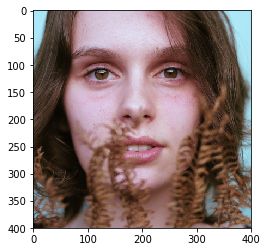

In [3]:
plt.imshow(img)
image= img_to_array(img)
#print(image)
print(image.shape)

In [5]:
print(image.shape)

(400, 400, 3)


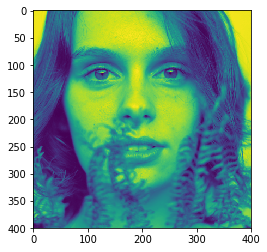

In [23]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
plt.imshow(X)
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [24]:
model= Sequential()
model.add(InputLayer(input_shape =(None, None, 1)))
model.add(Conv2D(8, (3,3), padding='same', activation='relu', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [25]:
model.compile(optimizer='rmsprop',loss='mse')

In [26]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 652ms/step - loss: 0.2548
Epoch 2/100
1/1 [==============================] - 0s 432ms/step - loss: 0.7516
Epoch 3/100
1/1 [==============================] - 0s 367ms/step - loss: 0.5206
Epoch 4/100
1/1 [==============================] - 0s 415ms/step - loss: 0.4142
Epoch 5/100
1/1 [==============================] - 0s 371ms/step - loss: 0.0238
Epoch 6/100
1/1 [==============================] - 0s 367ms/step - loss: 0.0296
Epoch 7/100
1/1 [==============================] - 0s 379ms/step - loss: 0.0150
Epoch 8/100
1/1 [==============================] - 0s 356ms/step - loss: 0.0087
Epoch 9/100
1/1 [==============================] - 0s 379ms/step - loss: 0.0079
Epoch 10/100
1/1 [==============================] - 0s 354ms/step - loss: 0.0076
Epoch 11/100
1/1 [==============================] - 0s 363ms/step - loss: 0.0074
Epoch 12/100
1/1 [==============================] - 0s 376ms/step - loss: 0.0071
Epoch 13/100
1/1 [===================

In [27]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output= output*128
print(output.shape)

1/1 [==============================] - 0s 147ms/step
0.003963676281273365
(1, 400, 400, 2)


In [29]:
op= np.zeros((400, 400, 3))
op[:,:,0]= X[0, :, :, 0]
op[:,:,1:]= output[0]
print(op.shape)

(400, 400, 3)


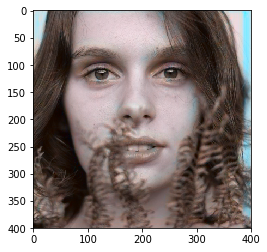

In [31]:
op= lab2rgb(op)
plt.imshow(lab2r)